# Introdução

Este estudo tem por fim analisar de forma empírica a complexidade do tempo de execução de uma série de algorimos de busca e ordenação.

Todos os algoritmos a seguir foram implementados em C e compilados com o GCC com a flag de debug `-ggdb3` ativada.

Os vetores são contruidos aleatóriamente de inteiros no intervalo de [0, INT_MAX]. Os testes consistem de vetores de tamanhos que variam [1, 140 000], com passo de 200 elementos e 1000 repetições para cada tamanho.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = [7.08, 3.54]
plt.rcParams["figure.dpi"] = 150
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['axes.grid'] = True

## Linear Search

A busca linear é um algoritmo que percorre um vetor de forma sequencial, comparando cada elemento do vetor com o elemento que se deseja encontrar.

Sua complexidade é a seguinte para o caso onde o elemento procurado encontra-se no vetor:

| Case                        | Order |
|-----------------------------|-------|
| Worst-case performance      | O(n)  |
| Best-case performance       | O(1)  |
| Average performance         | O(n)  |
| Worst-case space complexity | O(1)  |

In [104]:
%%bash
cd benchmarks/linear_search

make
./main > out.csv

echo "-------------------"

head out.csv
echo "..."
tail out.csv

make -C ../lib/
make[1]: Entering directory '/home/srjheam/projects/ed/benchmarks/lib'
mkdir -p build/
ar rcs libbench.a build/vector.o build/profiler.o
make[1]: Leaving directory '/home/srjheam/projects/ed/benchmarks/lib'
gcc -o main main.c -L ../lib/ -lbench -Wall -Wall -Wextra -Werror -pedantic -ggdb3 -I../lib -lm
-------------------
N menor maior media melhorElem piorElem
1 0 1e-06 2.07e-07 0 0
201 0 1.3e-05 5.68e-07 1e-06 1e-06
401 0 3e-06 8.13e-07 0 1e-06
601 0 2e-06 8.19e-07 0 1e-06
801 0 3.1e-05 1.015e-06 0 2e-06
1001 0 3e-06 1.207e-06 0 2e-06
1201 0 3e-06 1.405e-06 1e-06 3e-06
1401 0 7.1e-05 1.717e-06 0 3e-06
1601 0 8.8e-05 1.844e-06 1e-06 3e-06
...
138201 0 0.000336 0.000138681 0 0.000268
138401 0 0.000278 0.000138031 0 0.000272
138601 0 0.000301 0.000134673 1e-06 0.000309
138801 0 0.000562 0.000153433 0 0.000306
139001 0 0.000356 0.000150292 0 0.000308
139201 0 0.000366 0.00014522 0 0.00027
139401 0 0.000334 0.000136081 0 0.000271
139601 0 0.000317 0.000140049 0 0.000288
139

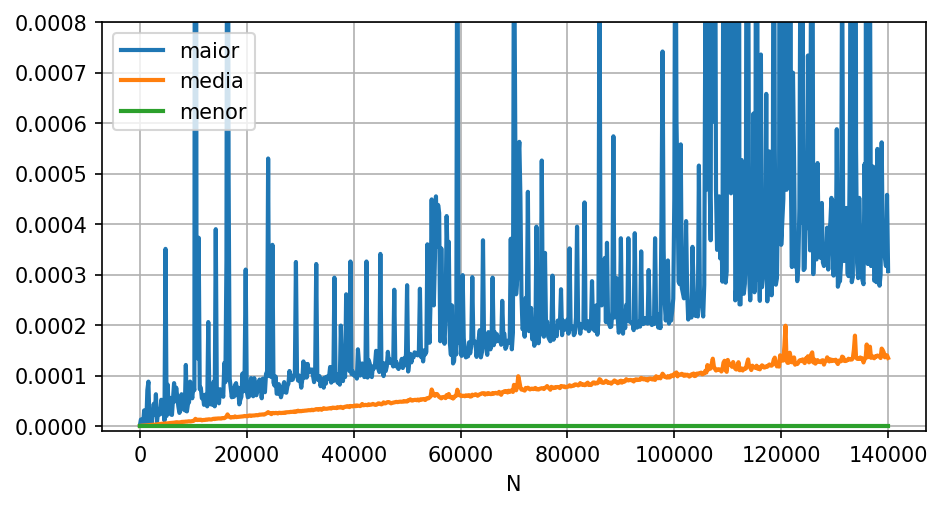

In [105]:
headers = ["N", "menor", "maior", "media", "melhorElem", "piorElem"]

src = "benchmarks/linear_search/out.csv"

df = pd.read_csv(src, names=headers, delim_whitespace=True, skiprows=1)

df.loc[:, df.columns.difference(["melhorElem", "piorElem"])].set_index("N").plot()

ax = plt.gca()
ax.set_ylim([-1e-5, 0.8e-03])

plt.show()

### Resultados

#### A curva do pior caso cresce como esperado, i.e., como uma função linear?

Sim, a curva do pior caso cresce como esperado.

Mesmo com a presença de outliers, na média, se assemelha a uma função linear.

#### E a do melhor caso? Ela é aproximadamente constante? Se não, como você explicaria isso?

A curva do melhor caso é constante e é igual a zero.

#### A curva do caso médio cresce na mesma taxa que o pior caso?

Não, a curva do caso médio mesmo linear cresce com um coeficiente angular visualmente menor que o do pior caso.

#### Na aula, vimos que o caso médio da busca linear é 2x mais rápido que o pior caso. Isto é visível no gráfico?

Sim, é possível observar que a curva do caso médio é aproximadamente 2x mais rápida que a do pior caso.

#### A curva do pior caso está sempre acima do melhor caso e do caso médio? Se não, em que região isto não acontece e por quê?

Sim, está sempre acima pois o caso médio é metade do pior caso e o melhor caso é zero. No melhor dos casos, o elemento procurado é o primeiro elemento do vetor e os tempos são iguais.

#### Compare as curvas usando o melhor caso e o pior caso reais e aqueles aproximados usando as M medidas.

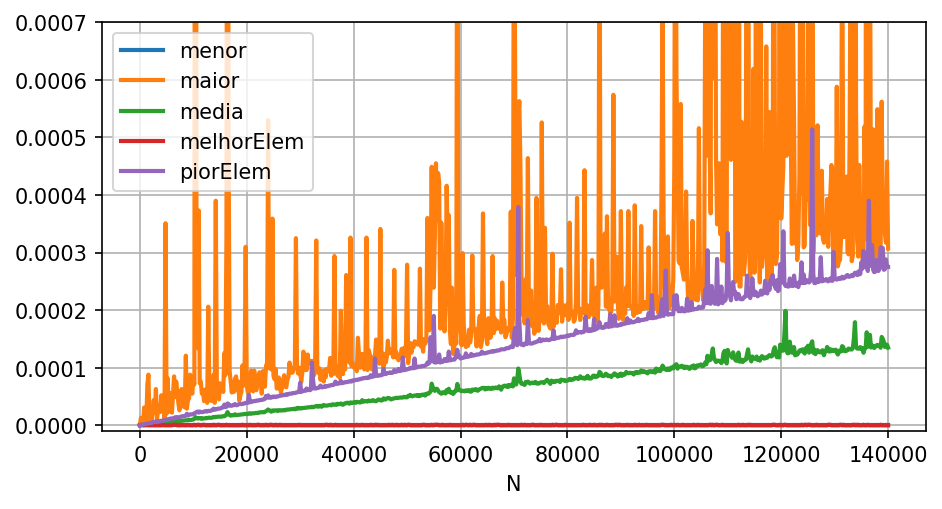

In [106]:
headers = ["N", "menor", "maior", "media", "melhorElem", "piorElem"]

src = "benchmarks/linear_search/out.csv"

df = pd.read_csv(src, names=headers, delim_whitespace=True, skiprows=1)

df.loc[:, df.columns.difference([])].set_index("N").plot()

ax = plt.gca()
ax.set_ylim([-1e-5, 0.7e-03])

plt.show()

##### A diferença entre as curvas é grande?

Não, a diferença entre as curvas quase inexistente pois ambos carregam o mesmo significado.

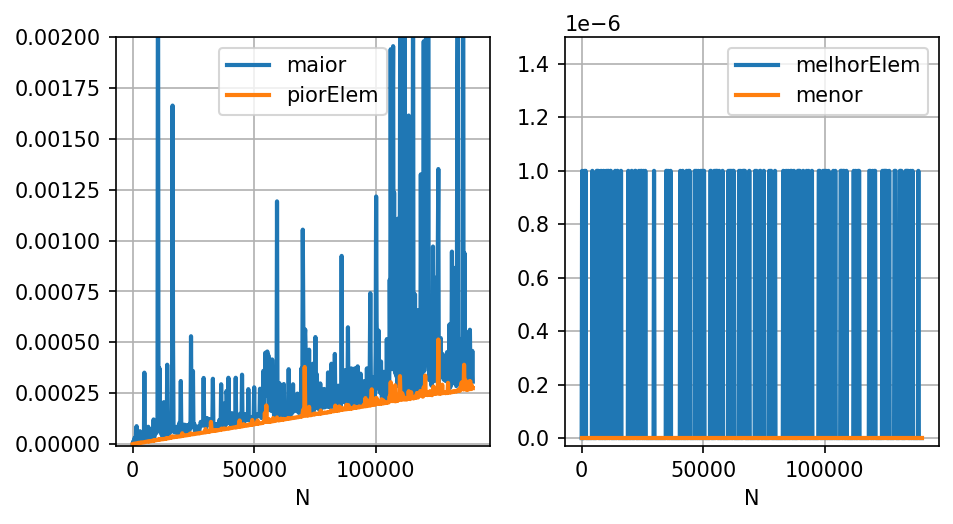

In [107]:
headers = ["N", "menor", "maior", "media", "melhorElem", "piorElem"]

src = "benchmarks/linear_search/out.csv"

df = pd.read_csv(src, names=headers, delim_whitespace=True, skiprows=1)

fig, axes = plt.subplots(1, 2)

df.loc[:, df.columns.difference(["menor", "media", "melhorElem"])].set_index("N").plot(ax=axes[0])

df.loc[:, df.columns.difference(["maior", "media", "piorElem"])].set_index("N").plot(ax=axes[1])

axes[0].set_ylim([-1e-5, 0.20e-2])
axes[1].set_ylim([-0.3e-7, 0.15e-5])

plt.show()

##### As curvas do pior caso real e do pior caso estimado crescem de formas similares?

Sim, crescem de formas similares.

##### E do melhor caso?

Mesmo com a presença de outliers, tendem a zero.

## Binary Search

A busca binária é um algoritmo que percorre um vetor ordenado através do método de dividir para conquistar, partindo ele em subvetores e comparando o elemento que se deseja encontrar com o elemento do meio do vetor, seguindo para a metade do vetor onde o elemento se encontra.

Sua complexidade é a seguinte para o caso onde o elemento procurado encontra-se no vetor:

| Case                        | Order     |
|-----------------------------|-----------|
| Worst-case performance      | O(log n)  |
| Best-case performance       | O(1)      |
| Average performance         | O(log n)  |
| Worst-case space complexity | O(1)      |

In [59]:
%%bash
cd benchmarks/binary_search

make
./main > out.csv

echo "-------------------"

head out.csv
echo "..."
tail out.csv

make -C ../lib/
make[1]: Entering directory '/home/srjheam/projects/ed/benchmarks/lib'
mkdir -p build/
ar rcs libbench.a build/vector.o build/profiler.o
make[1]: Leaving directory '/home/srjheam/projects/ed/benchmarks/lib'
gcc -o main main.c -L ../lib/ -lbench -Wall -Wall -Wextra -Werror -pedantic -ggdb3 -I../lib -lm
-------------------
N menor maior media melhorElem piorElem
1 0 1e-06 2e-07 1e-06 1e-06
201 0 1e-06 2.98e-07 0 0
401 0 9e-06 3.56e-07 1e-06 1e-06
601 0 1e-06 3.65e-07 0 0
801 0 1e-06 3.71e-07 1e-06 0
1001 0 1e-06 4.27e-07 1e-06 0
1201 0 1e-06 4.08e-07 0 0
1401 0 1e-06 3.39e-07 0 0
1601 0 1e-06 2.98e-07 0 0
...
138201 0 1e-06 3.59e-07 0 0
138401 0 1e-06 3.58e-07 0 1e-06
138601 0 2e-06 3.57e-07 1e-06 0
138801 0 2e-06 3.8e-07 0 0
139001 0 1e-06 3.3e-07 0 0
139201 0 1e-06 3.44e-07 0 0
139401 0 4e-06 3.85e-07 0 0
139601 0 3.6e-05 3.78e-07 1e-06 0
139801 0 1e-05 3.63e-07 0 0
140001 0 2e-06 3.6e-07 0 0


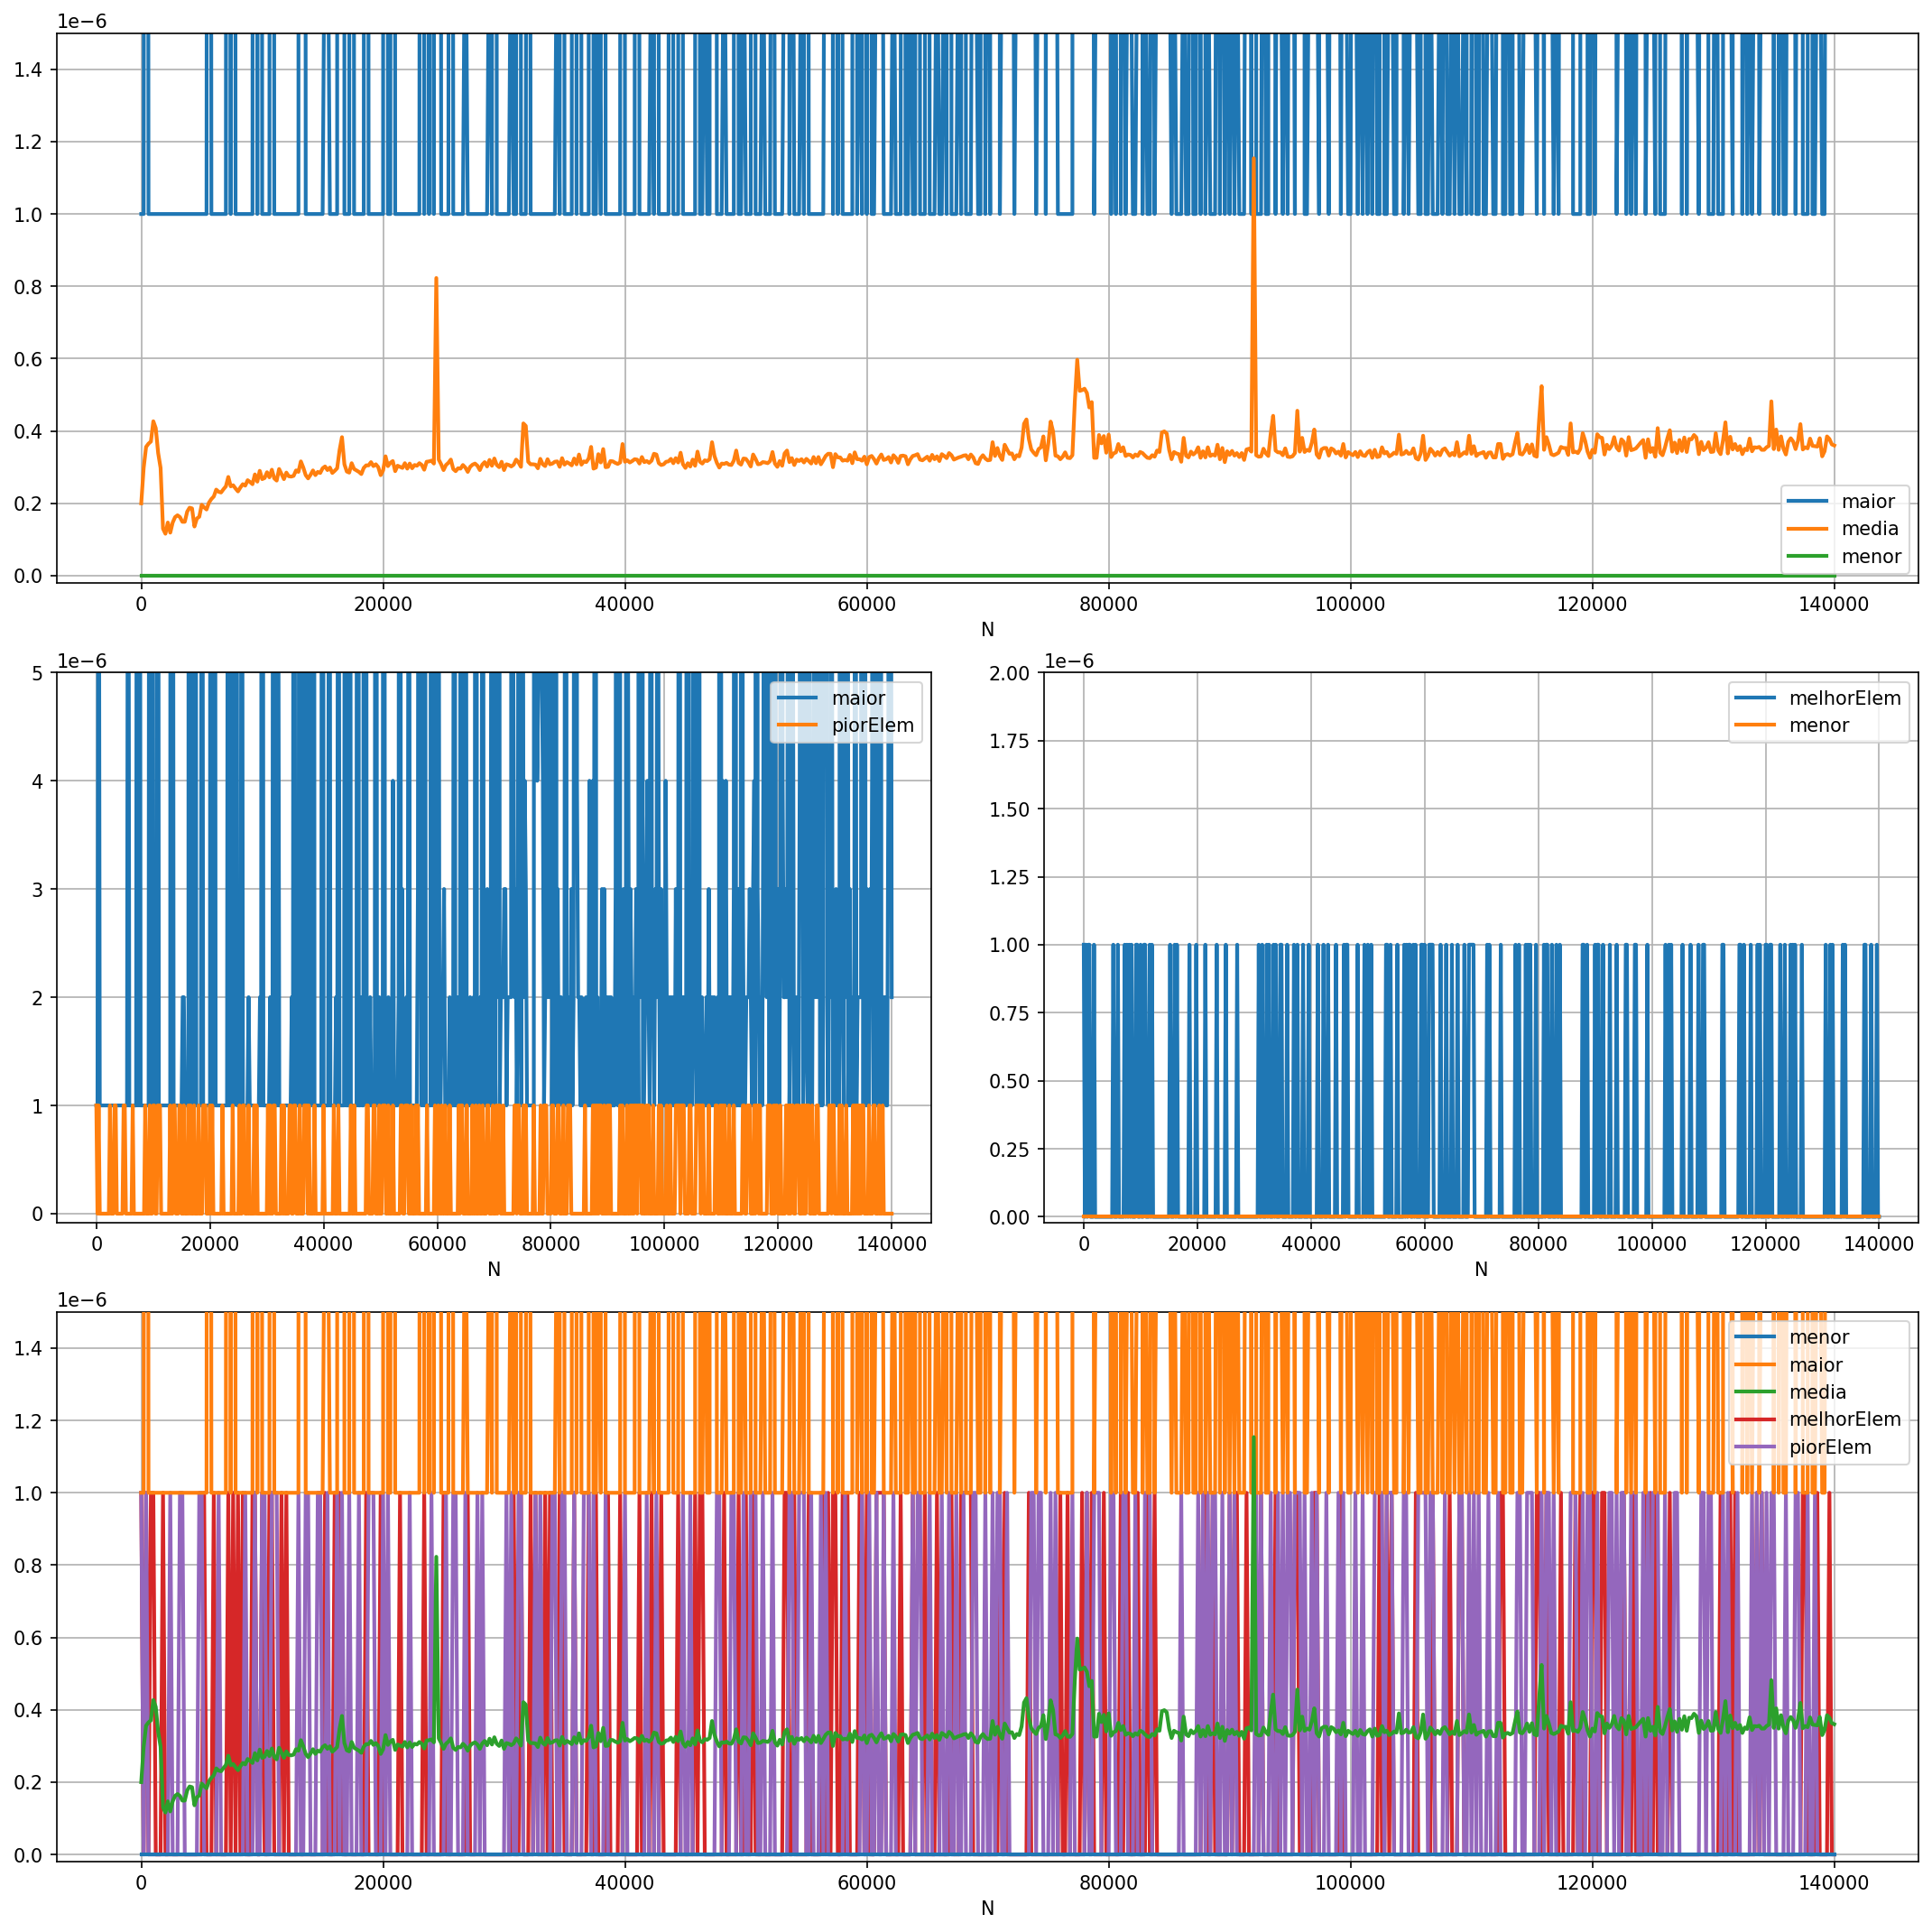

In [62]:
headers = ["N", "menor", "maior", "media", "melhorElem", "piorElem"]

src = "benchmarks/binary_search/out.csv"

df = pd.read_csv(src, names=headers, delim_whitespace=True, skiprows=1)

fig, axes = plt.subplot_mosaic("AA;CD;EE", constrained_layout=True)

fig.set_size_inches(14.16, 14.16)

df.loc[:, df.columns.difference(["melhorElem", "piorElem"])].set_index("N").plot(ax=axes["A"])
axes["A"].set_ylim([-0.2e-7, 1.5e-6])

df.loc[:, df.columns.difference(["media", "menor", "melhorElem"])].set_index("N").plot(ax=axes["C"])
axes["C"].set_ylim([-0.8e-7, 0.5e-5])

df.loc[:, df.columns.difference(["media", "maior", "piorElem"])].set_index("N").plot(ax=axes["D"])
axes["D"].set_ylim([-0.2e-7, 0.2e-5])

df.loc[:, df.columns.difference([])].set_index("N").plot(ax=axes["E"])
axes["E"].set_ylim([-0.2e-7, 1.5e-6])
axes["E"].lines[0].zorder = 3
axes["E"].lines[1].zorder = 3
axes["E"].lines[2].zorder = 3

plt.show()

### Resultados

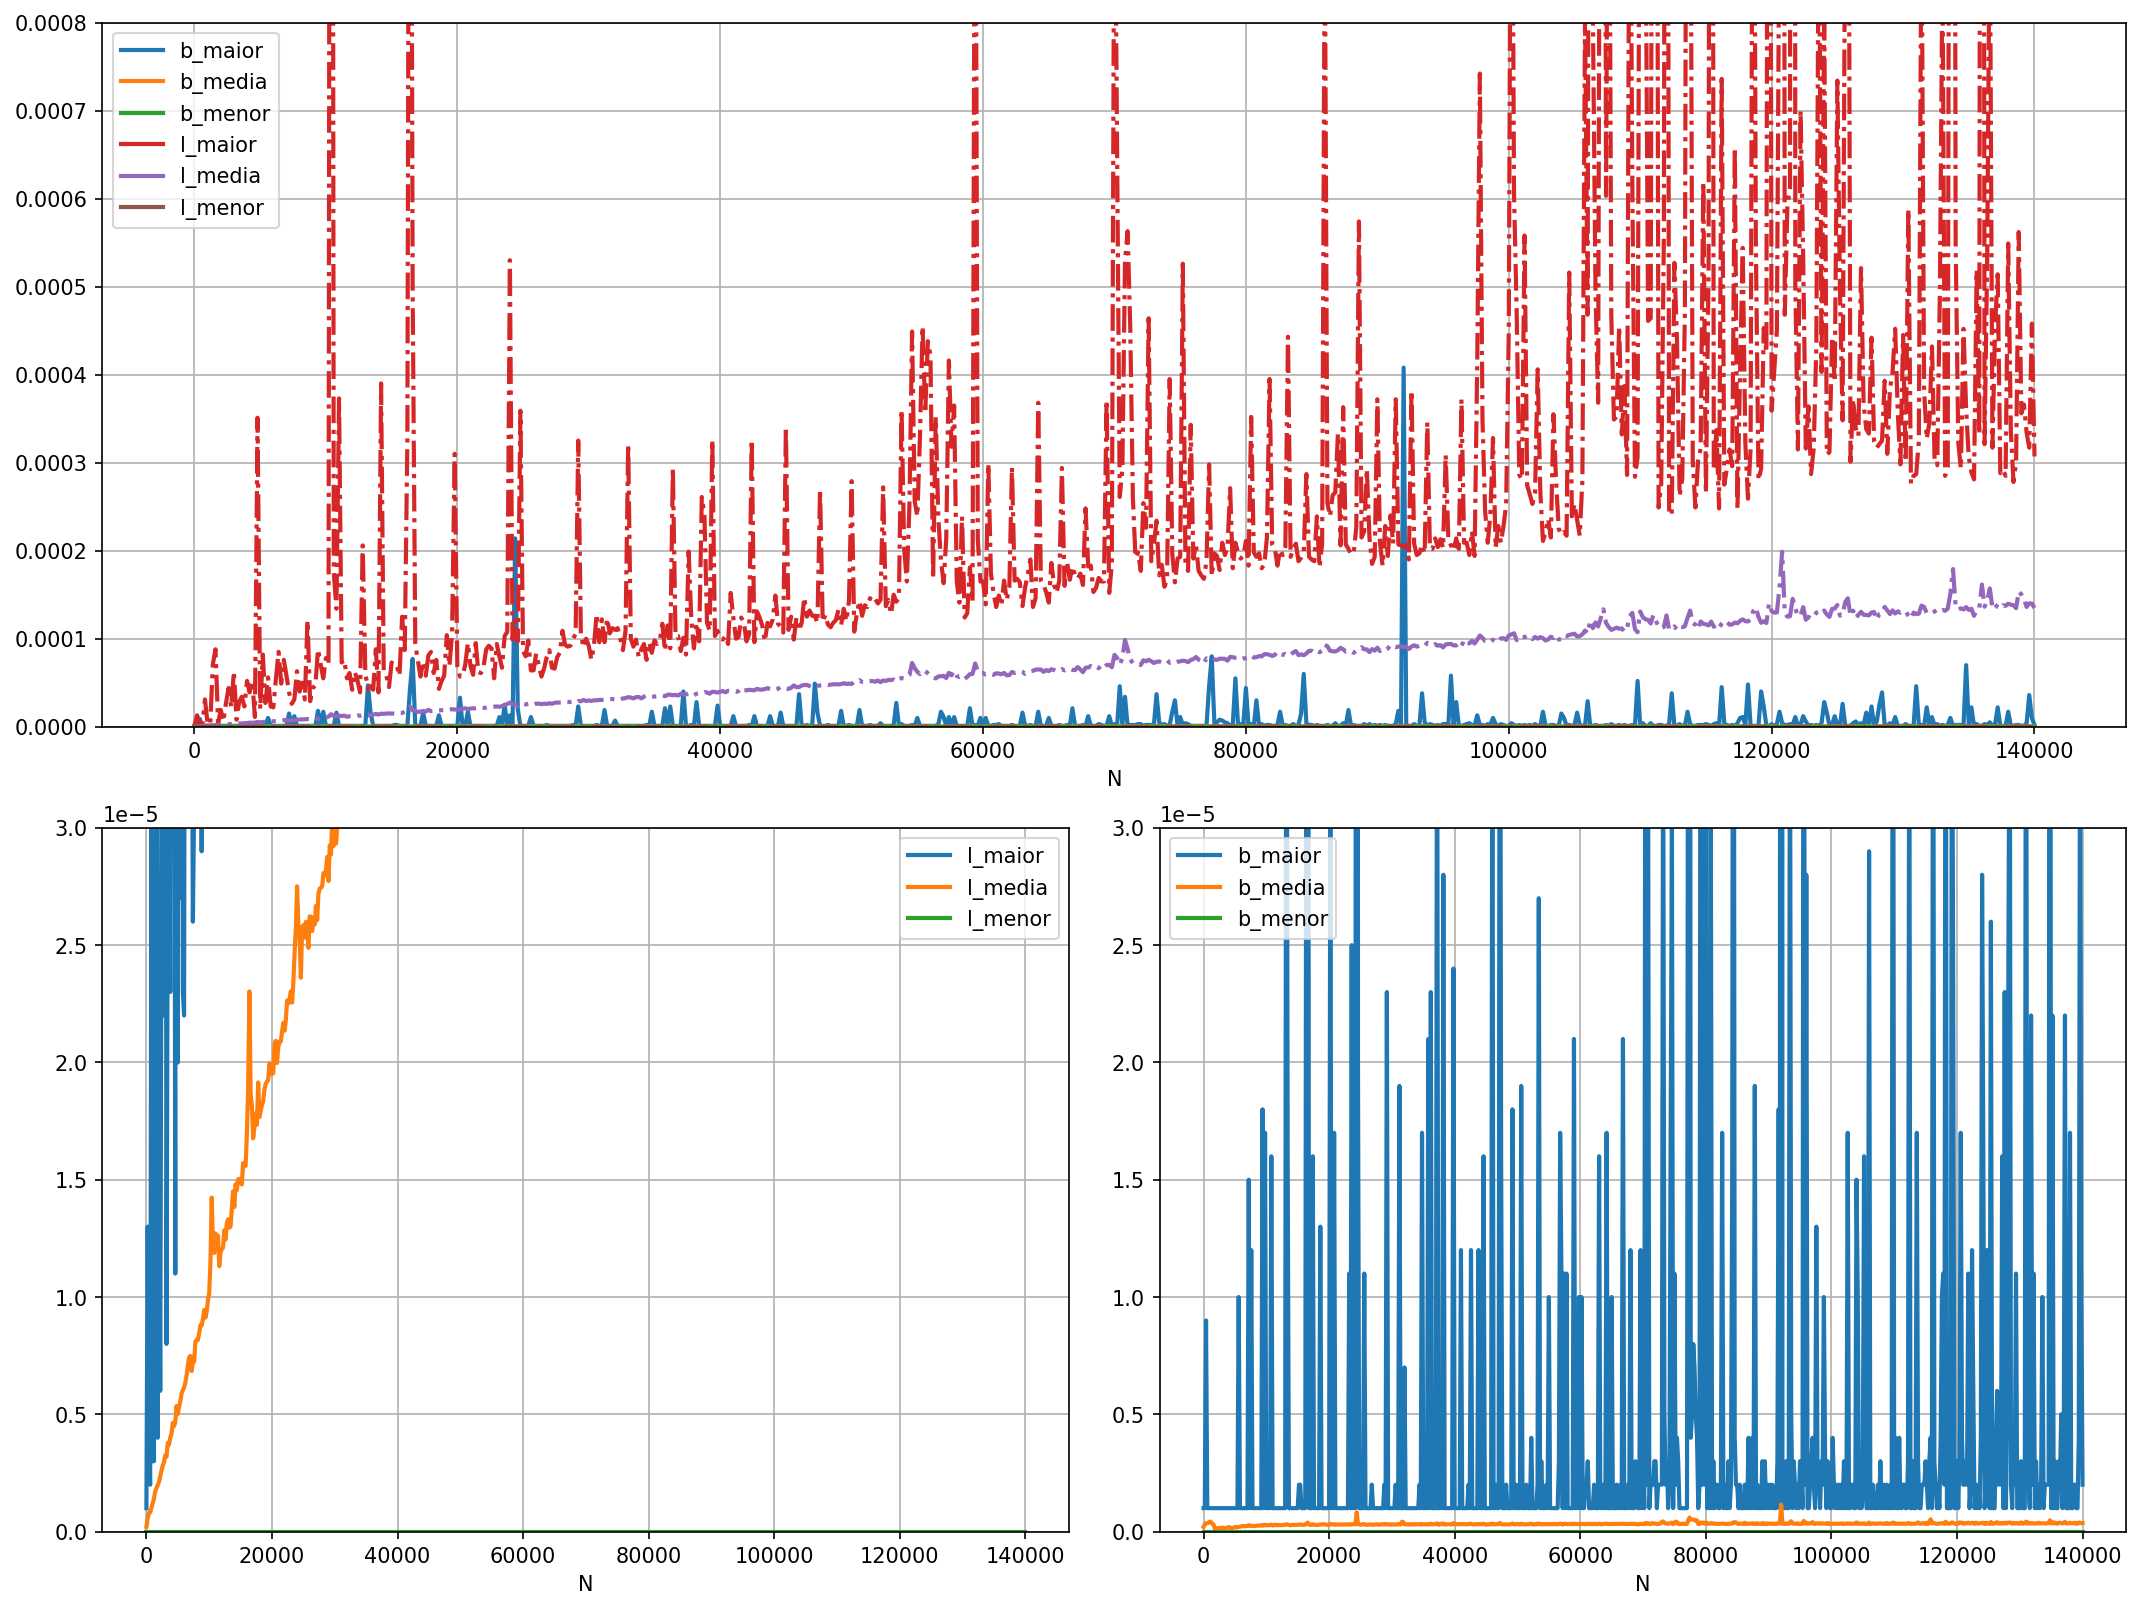

In [61]:
import matplotlib as mpl

lsearch_headers = ["N", "menor", "maior", "media", "melhorElem", "piorElem"]
lsearch_src = "benchmarks/linear_search/out.csv"
lsearch_df = pd.read_csv(lsearch_src, names=lsearch_headers, delim_whitespace=True, skiprows=1)
lsearch_df.columns = ["l_" + col if col != "N" else col for col in lsearch_df.columns]

bsearch_headers = ["N", "menor", "maior", "media", "melhorElem", "piorElem"]
bsearch_src = "benchmarks/binary_search/out.csv"
bsearch_df = pd.read_csv(bsearch_src, names=bsearch_headers, delim_whitespace=True, skiprows=1)
bsearch_df.columns = ["b_" + col if col != "N" else col for col in bsearch_df.columns]

df_merged = pd.concat([lsearch_df, bsearch_df])

fig, axes = plt.subplot_mosaic("AA;BC", constrained_layout=True)

fig.set_size_inches(14.16, 10.62)

df_merged.loc[:, df_merged.columns.difference([col for col in df_merged.columns if col.endswith(("melhorElem", "piorElem"))])].set_index("N").plot(ax=axes["A"])
axes["A"].set_ylim([-0.2e-7, 0.8e-03])
axes["A"].lines[3].set_linestyle("-.")
axes["A"].lines[4].set_linestyle("-.")
axes["A"].lines[5].set_linestyle("-.")

lsearch_df.loc[:, lsearch_df.columns.difference(["l_melhorElem", "l_piorElem"])].set_index("N").plot(ax=axes["B"])
axes["B"].set_ylim([-0.2e-7, 0.3e-4])

bsearch_df.loc[:, bsearch_df.columns.difference(["b_melhorElem", "b_piorElem"])].set_index("N").plot(ax=axes["C"])
axes["C"].set_ylim([-0.2e-7, 0.3e-4])

plt.show()

#### O pior caso e o caso médio da busca binária crescem aproximadamente de acordo com a mesma taxa?

Teoricamente sim, mas visualmente fica dificil identificar algum padrão no pior caso.

#### A diferença entre os piores casos da busca linear e binária refletem o que foi visto em sala, i.e., que a busca binária segue uma função linear e a binária uma função log?

Sim, e quando traçados em paralelo a diferença na complexidade de tempo se prova gigante vide figuras acima.

#### O efeito de crescimento da diferença entre os piores casos e os casos médios foi observado na prática?



Para o caso da busca binária, fica difícil identificar o comportamento do pior caso.

Contudo, se a comparação for entre a busca binária e a busca linear, vale destacar que a diferença é ordens de grandeza maior quanto maior o tamanho do vetor.

## Bubble Sort

Como o primeiro dos algoritmos de ordenação estudados, o bubble sort é um algoritmo que percorre um vetor de forma sequencial, comparando cada elemento do vetor com o elemento seguinte, trocando-os de posição caso o elemento seguinte seja menor que o elemento atual até que todo o vetor esteja ordenado.

| Case                        | Order     |
|-----------------------------|-----------|
| Worst-case performance      | O($n^2$)  |
| Best-case performance       | O(n)      |
| Average performance         | O($n^2$)  |
| Worst-case space complexity | O(1)      |

In [51]:
%%bash
cd benchmarks/bubble_sort

make
./main > out.csv

echo "-------------------"

head out.csv
echo "..."
tail out.csv

make -C ../lib/
make[1]: Entering directory '/home/srjheam/projects/ed/benchmarks/lib'
mkdir -p build/
ar rcs libbench.a build/vector.o build/profiler.o
make[1]: Leaving directory '/home/srjheam/projects/ed/benchmarks/lib'
gcc -o main main.c -L ../lib/ -lbench -Wall -Wall -Wextra -Werror -pedantic -ggdb3 -I../lib -lm
-------------------
N menor maior media ordenado reverso
1 0 1e-06 3.33333e-07 0 0
1401 0 0.015263 0.0124518 7e-06 0.017673
2801 0 0.065587 0.0559077 9e-06 0.041025
4201 0 0.149276 0.123477 2.4e-05 0.167601
5601 0 0.256996 0.199695 3.5e-05 0.303072
7001 0 0.422807 0.345751 2.1e-05 0.312832
8401 0 0.589696 0.497422 2.6e-05 0.50142
9801 0 0.736289 0.660381 3e-05 0.617906
11201 0 0.993655 0.883019 3.6e-05 0.95143
...
1401 0 0.015263 0.0124518 7e-06 0.017673
2801 0 0.065587 0.0559077 9e-06 0.041025
4201 0 0.149276 0.123477 2.4e-05 0.167601
5601 0 0.256996 0.199695 3.5e-05 0.303072
7001 0 0.422807 0.345751 2.1e-05 0.312832
8401 0 0.589696 0.497422 2.6e-05 0.50142
9801 0 0.73628

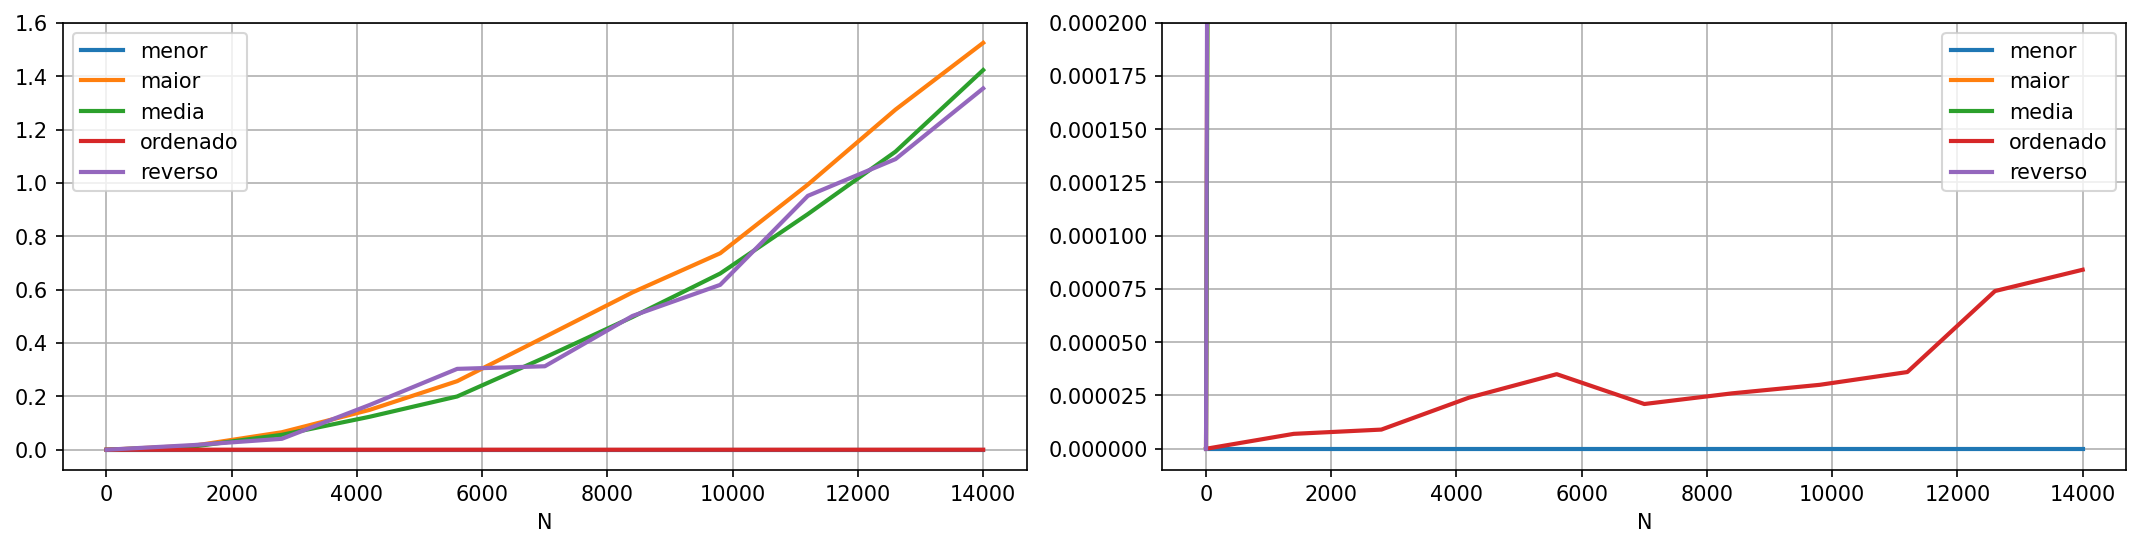

In [52]:
headers = ["N", "menor", "maior", "media", "ordenado", "reverso"]

src = "benchmarks/bubble_sort/out.csv"

df = pd.read_csv(src, names=headers, delim_whitespace=True, skiprows=1)

fig, axes = plt.subplot_mosaic("AB", constrained_layout=True)

fig.set_size_inches(14.16, 3.54)

df.loc[:, df.columns.difference([])].set_index("N").plot(ax=axes["A"])

df.loc[:, df.columns.difference([])].set_index("N").plot(ax=axes["B"])
axes["B"].set_ylim([-1e-05, 2e-04])

plt.show()

### Resultados

#### Analisando os gráficos do melhor caso, do pior caso e do caso médio empírico você é capaz de adivinhar as funções que descrevem as taxas de crescimento do tempo em função do tamanho do vetor?

Sim, as curvas se assemelham muito a uma função linear e quadrática, respectivamente.

#### Plote um gráfico com o pior caso da busca binária, da busca linear e do bubble sort. Em conjunto, plote os gráficos das funções que você acha que descrevem a taxa de crescimento dos tempos em função das entradas dentre as possibilidades: $1$, $\log N$, $N$, $N \log N$, $N^2$, $N^3$, $2^N$.



## Sort and Search or Search and Sort?

Quando se deseja fazer uma consulta a um vetor é preciso optar entre fazer a busca imediata e linearmente; ou, pagar o preço de ordená-lo para só então percorre-lo de forma binária.

Os testes abaixo cruzam uma série de consultas sucessivas M a um vetor com 1000 elementos fazendo uma busca linear e então uma busca binária contando com o tempo inicial de ordenação do vetor.

In [54]:
%%bash
cd benchmarks/sort_search

make
./main > out.csv

echo "-------------------"

head out.csv
echo "..."
tail out.csv

make -C ../lib/
make[1]: Entering directory '/home/srjheam/projects/ed/benchmarks/lib'
mkdir -p build/
ar rcs libbench.a build/vector.o build/profiler.o
make[1]: Leaving directory '/home/srjheam/projects/ed/benchmarks/lib'
gcc -o main main.c -L ../lib/ -lbench -Wall -Wall -Wextra -Werror -pedantic -ggdb3 -I../lib -lm
-------------------
M lsearch_min lsearch_max lsearch_avg bbsort_bsearch_min bbsort_bsearch_max bbsort_bsearch_avg
1 0 2e-06 2e-06 0 0 0.003849
11 0 2e-06 1e-06 0 1e-06 0.000350273
21 0 2e-06 1.28571e-06 0 1e-06 0.000183476
31 0 3e-06 1.32258e-06 0 1e-06 0.000124323
41 0 3e-06 1.31707e-06 0 1e-06 9.40976e-05
51 0 2e-06 1.47059e-06 0 1e-06 7.57647e-05
61 0 2e-06 1.22951e-06 0 1e-06 6.33443e-05
71 0 3e-06 1.3662e-06 0 1e-06 5.45352e-05
81 0 3e-06 1.30864e-06 0 1e-06 4.78395e-05
...
9911 0 0.000162 1.30058e-06 0 0.000335 7.16578e-07
9921 0 0.000316 1.38e-06 0 6.6e-05 6.96099e-07
9931 0 0.000107 1.25315e-06 0 0.000109 6.93284e-07
9941 0 4e-05 1.23428e-06 0 0.000235 6.79409e-07

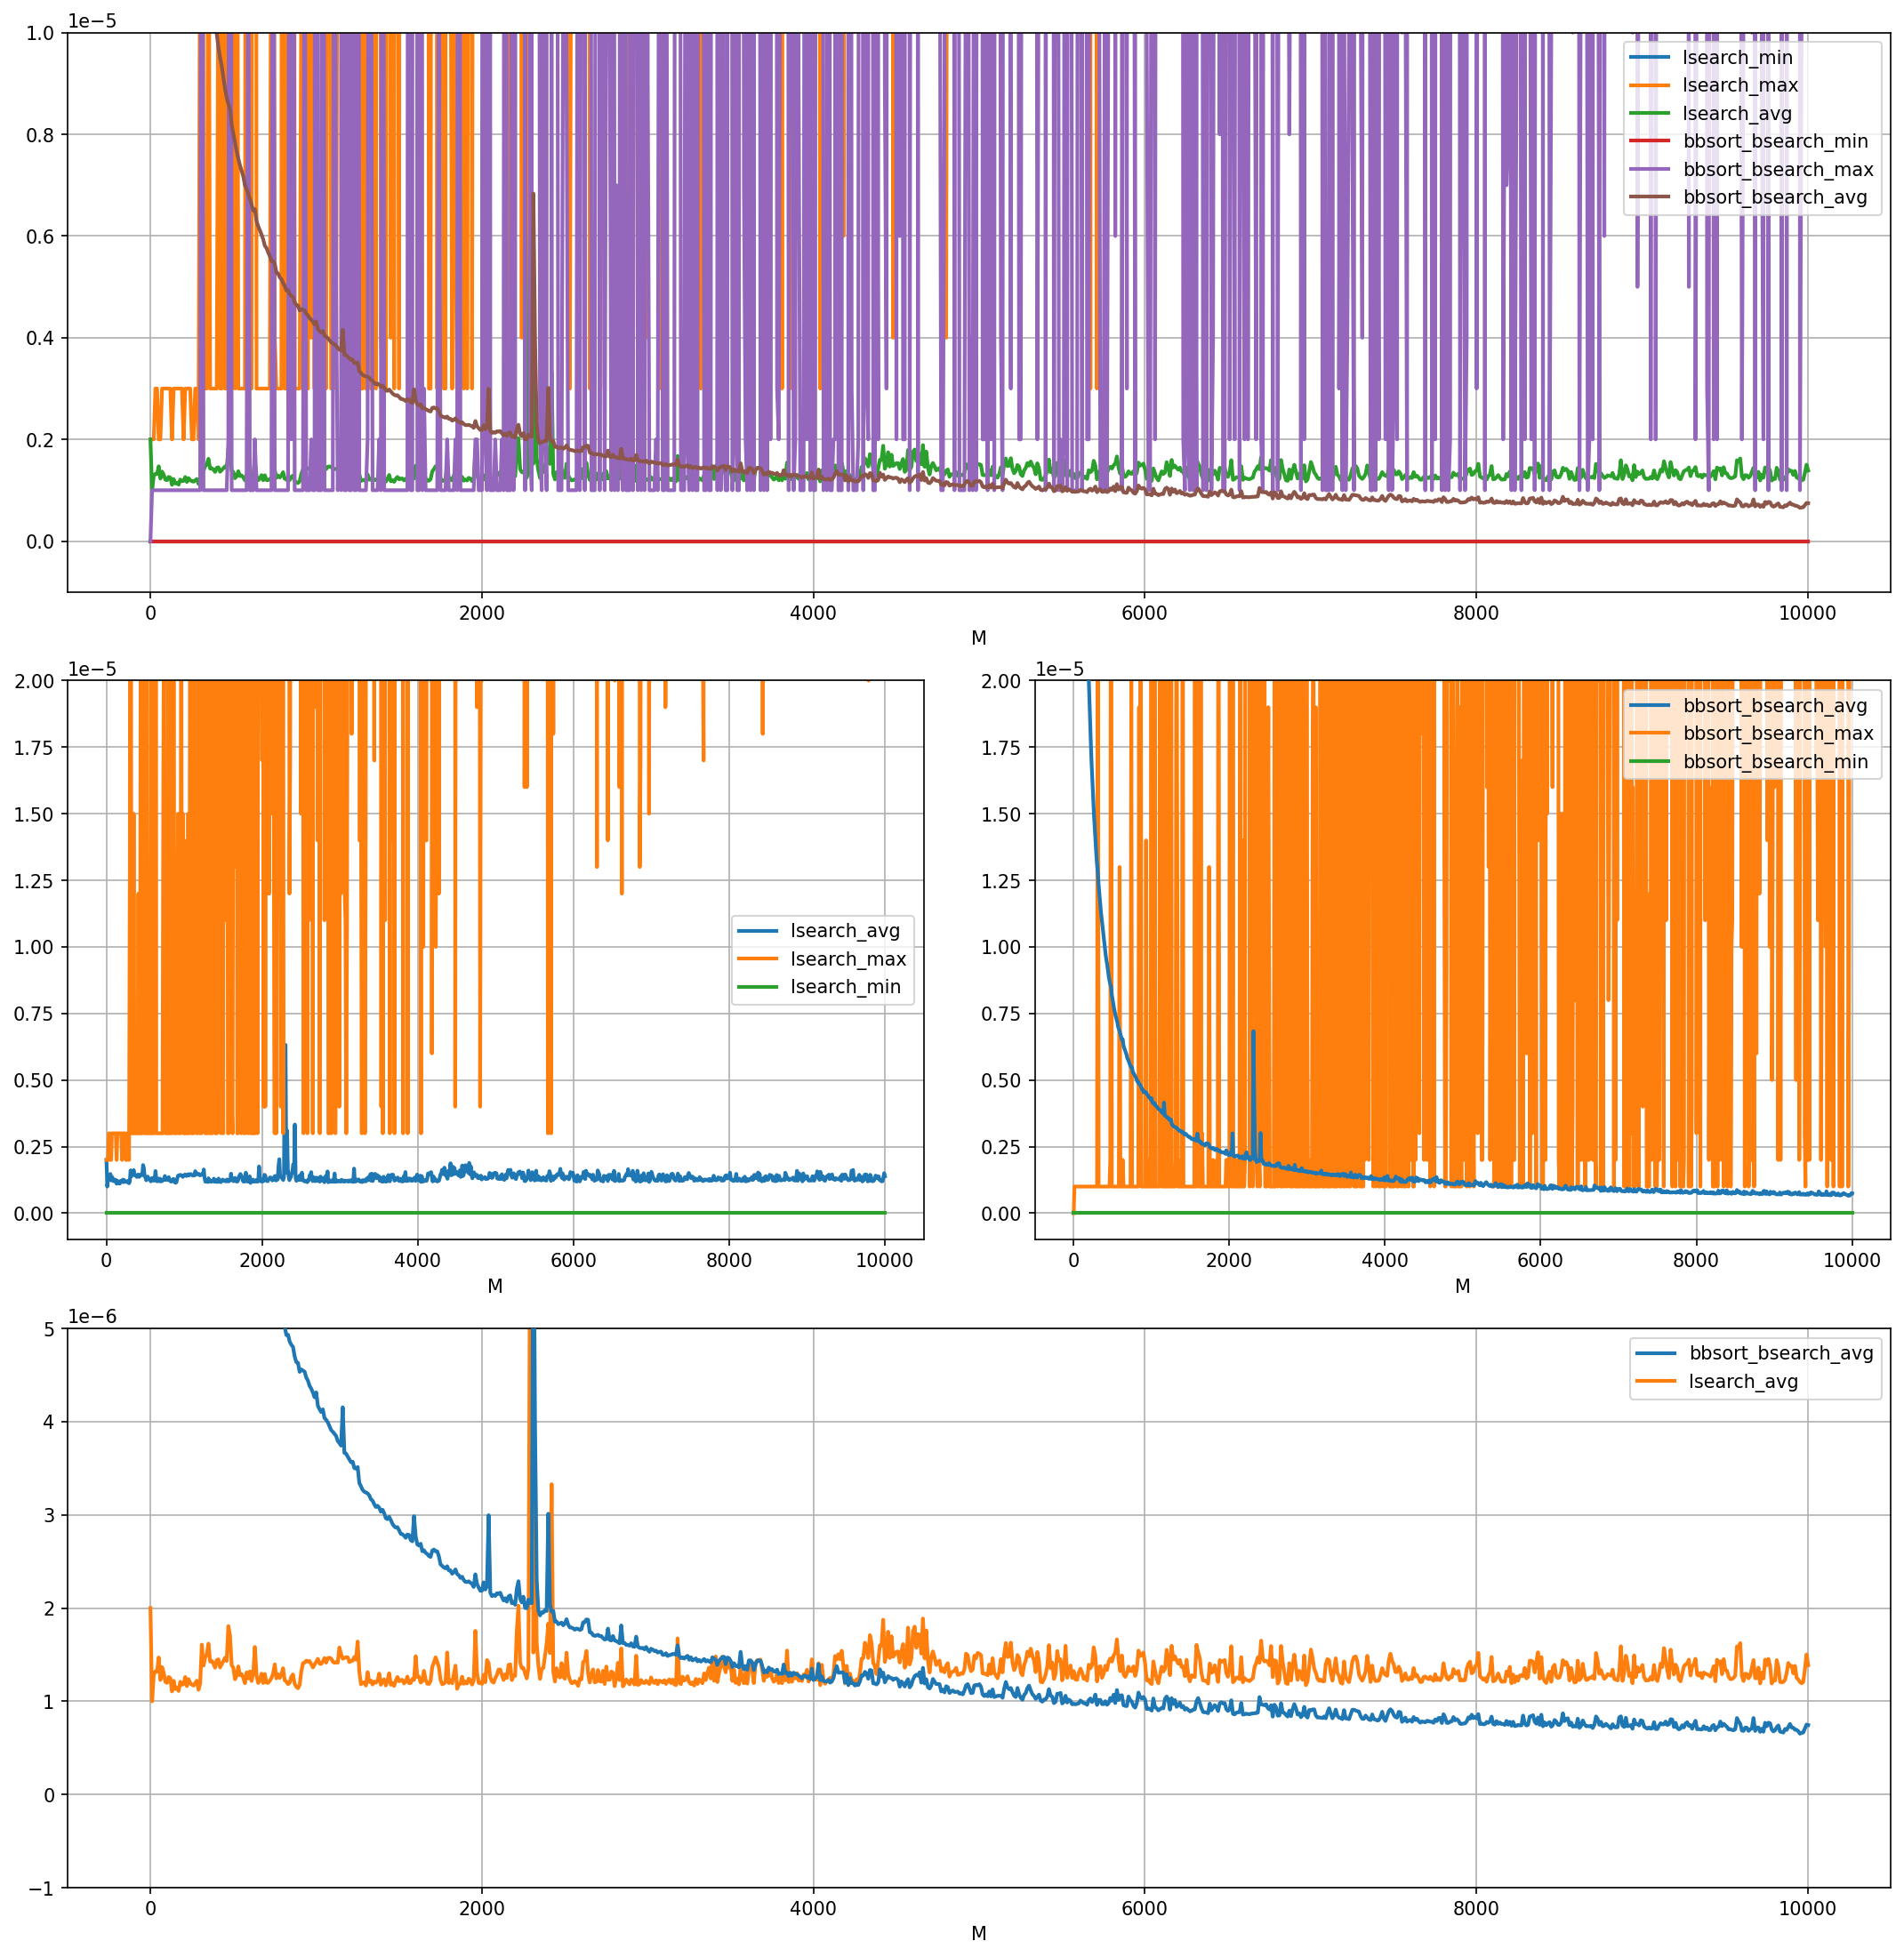

In [64]:
headers = ["M", "lsearch_min", "lsearch_max", "lsearch_avg", "bbsort_bsearch_min", "bbsort_bsearch_max", "bbsort_bsearch_avg"]

src = "benchmarks/sort_search/out.csv"

df = pd.read_csv(src, names=headers, delim_whitespace=True, skiprows=1)

fig, axes = plt.subplot_mosaic("AA;BC;DD", constrained_layout=True)

fig.set_size_inches(14.16, 14.56)

df.loc[:, df.columns.difference([])].set_index("M").plot(ax=axes["A"])
axes["A"].set_ylim([-1e-06, 1e-5])

df.loc[:, df.columns.difference([col for col in df.columns if col.startswith("bbsort_bsearch_")])].set_index("M").plot(ax=axes["B"])
axes["B"].set_ylim([-1e-06, 0.2e-4])

df.loc[:, df.columns.difference([col for col in df.columns if col.startswith("lsearch_")])].set_index("M").plot(ax=axes["C"])
axes["C"].set_ylim([-1e-06, 0.2e-4])
axes["C"].lines[0].zorder = 3

df.loc[:, df.columns.difference([col for col in df.columns if "avg" not in col and col != "M"])].set_index("M").plot(ax=axes["D"])
axes["D"].set_ylim([-1e-06, 0.5e-5])
axes["D"].lines[0].zorder = 3

plt.show()

### Resultados

#### O que é mais vantajoso, usar sempre buscas lineares ou ordenar primeiro e depois realizar buscas binárias? Em que situações um é melhor que o outro?

Depende, caso hajam muitas buscas sobre o mesmo vetor, em algum ponto será mais barato ordenar e só então buscar com o binary search.

#### A partir de que valor de M se torna vantajoso ordenar antes e realizar buscas aleatórias?

Com o bubble sort, o ponto de inflexão é aproximadamente mais que quatro mil consultas sobre o mesmo vetor.

#### Na sua opinião, usar outro algoritmo de ordenação como o quick sort faria diferença na análise? Por quê? Quais diferenças você esperaria encontrar?

Usar outro algoritmo que ordenação mais eficiente mitigaria o custo inicial de ordenação do vetor e reduziria o ponto de inflexão do número de consultas.

## Quicksort

Com uma das menores complexidades de tempo, o quicksort é um algoritmo de ordenação que percorre um vetor dividindo-o recursivamente em metades e então recontroe o vetor juntando suas partes de forma ordenada.

Sua complexidade é a seguinte para o caso onde o elemento procurado encontra-se no vetor:

| Case                        | Order         |
|-----------------------------|---------------|
| Worst-case performance      | O($n^2$)      |
| Best-case performance       | O($n \log n$) |
| Average performance         | O($n \log n$) |
| Worst-case space complexity | O($n$)        |